#  Flight Price Prediction

## Airlines use complex algorithms to calculate flight prices given the various conditions present at that particular time. These methods take into account financial, marketing and various social factors to predict flight prices.
## Airline ticket prices can be a difficult thing to guess, today we might see a price, check the price of the same flight tomorrow and it will be a different story.

![flight](https://s.wsj.net/public/resources/images/BN-QZ863_201611_GR_20161130111040.gif)

<h1><b><u>Problem Definition</u> :- Build a machine learning model to predict the price of the flight ticket.</b></h1>

## Nowadays, the number of people using flights has increased significantly. It is difficult for airlines to hold prices as prices change dynamically due to different conditions.That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. It can also help customers to predict future flight prices and plan their journey accordingly

* >We have 2 datasets here — training set and test set.
### The training set contains the features, along with the prices of the flights. It contains 10683 records, 10 input features and 1 output column — ‘Price’.
### The test set contains 2671 records and 10 input features. The output ‘Price’ column needs to be predicted in this set. We will use Regression techniques here, since the predicted output will be a continuous value.

### Following is the description of features available in the dataset –
1. Airline: The name of the airline.
2. Date_of_Journey: The date of the journey
3. Source: The source from which the service begins.
4. Destination: The destination where the service ends.
5. Route: The route taken by the flight to reach the destination.
6. Dep_Time: The time when the journey starts from the source.
7. Arrival_Time: Time of arrival at the destination.
8. Duration: Total duration of the flight.
9. Total_Stops: Total stops between the source and destination.
10. Additional_Info: Additional information about the flight
11. Price: The price of the ticket

### So let’s begin exploring our data set and start building a prediction model.
![begin](https://media0.giphy.com/media/ML40hFvZTdCNgSMM5H/200w.gif)

# Importing Libraries

In [72]:
import numpy as np 
import pandas as pd 
import matplotlib .pyplot as plt
import seaborn as sns

# Data Collection and Information

In [73]:
train_data = pd.read_excel("Data_Train.xlsx")
pd.set_option('display.max_columns', None)
train_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [74]:
#Dataset Information
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### All the columns except our Prediction column, are Object Datatype.
#### Two missing values, one in the Route Column and other in the Total Stops Column

In [75]:
# drop missing values
train_data.dropna(inplace = True)


In [76]:
# check missing values again
train_data.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#### no misssing values , good to proceed!

# Exploratory Data Analysis, Data Visualization and Feature Engineering

#### Date_of_Journey is an object data type, Therefore, we have to convert this datatype to a timestamp to use this column correctly for prediction.

In [77]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day


In [78]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month


In [79]:
train_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [80]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [81]:
train_data["Duration"].value_counts()


2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
32h 55m      1
33h 45m      1
47h          1
47h 40m      1
29h 40m      1
Name: Duration, Length: 368, dtype: int64

#### Longer Time Duration has lesser count than the short Duration Flight.

In [82]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [83]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [105]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [50]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [106]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [107]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [108]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [54]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


###  Data Visualization

[Text(0, 0, '3'), Text(1, 0, '4'), Text(2, 0, '5'), Text(3, 0, '6')]

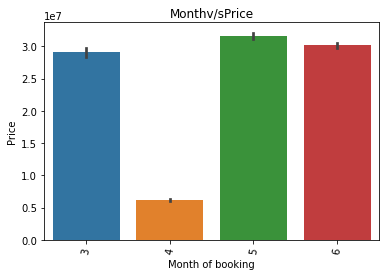

In [55]:
#Journey month v/s total fare
v1=sns.barplot(x='Journey_month', y='Price', data=train_data,estimator=sum)
v1.set_title('Monthv/sPrice')
v1.set_ylabel('Price')
v1.set_xlabel('Month of booking')
v1.set_xticklabels(v1.get_xticklabels(), rotation=80)

#### Highest Price is on 5th month, i.e. May

In [56]:
#count of flights per month
top_month=train_data.Journey_month.value_counts()
top_month

5    3465
6    3414
3    2724
4    1079
Name: Journey_month, dtype: int64

#### Total number of trip is the maximum for the month of May which can also be inferred from the above bar chart which shows that the total fare is the maximum in May. This can be because of:
- Summer vacation in the month of May for schools / universities, so most families usually go on vacation around this time as well.

#### The flight count is lower in April, this may be due to the fact that:
- Schools, colleges have their final exams during this period, offices are mostly busy in April as it is the end of the first quarter.

<AxesSubplot:xlabel='Journey_month'>

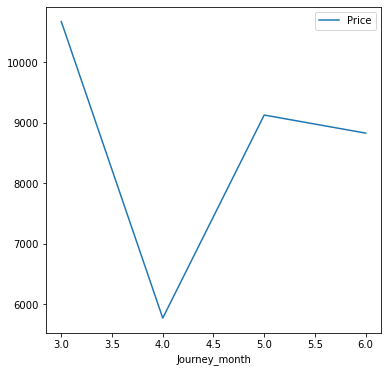

In [57]:
monthly_avg=train_data.groupby(['Journey_month']).agg({'Price':np.mean}).reset_index()

#Journey month v/s Averagefare
monthly_avg.plot(x='Journey_month',y='Price',figsize=(6,6))

#### We see that the average fare price is higher in the month of March, this could be because people tend to book the fights 2-3 months before their travel date, which leads to higher demand and therefore higher prices. booked to travel in May is the most, advance bookings are made in March

[Text(0, 0, 'non-stop'),
 Text(1, 0, '2 stops'),
 Text(2, 0, '1 stop'),
 Text(3, 0, '3 stops'),
 Text(4, 0, '4 stops')]

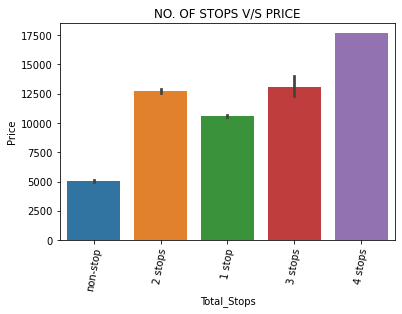

In [58]:
#total stops v/s average price
v4=sns.barplot(x='Total_Stops', y='Price', data=train_data)
v4.set_title('NO. OF STOPS V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('Total_Stops')
v4.set_xticklabels(v4.get_xticklabels(), rotation=80)

#### Since a direct / non-stop flight takes into account the fare of only one flight per journey, its fair average is the lowest. Like n. of stops / stopovers increase, the fare price rises by n. of flights and for the exhaustion of other resources for them.

<function matplotlib.pyplot.show(close=None, block=None)>

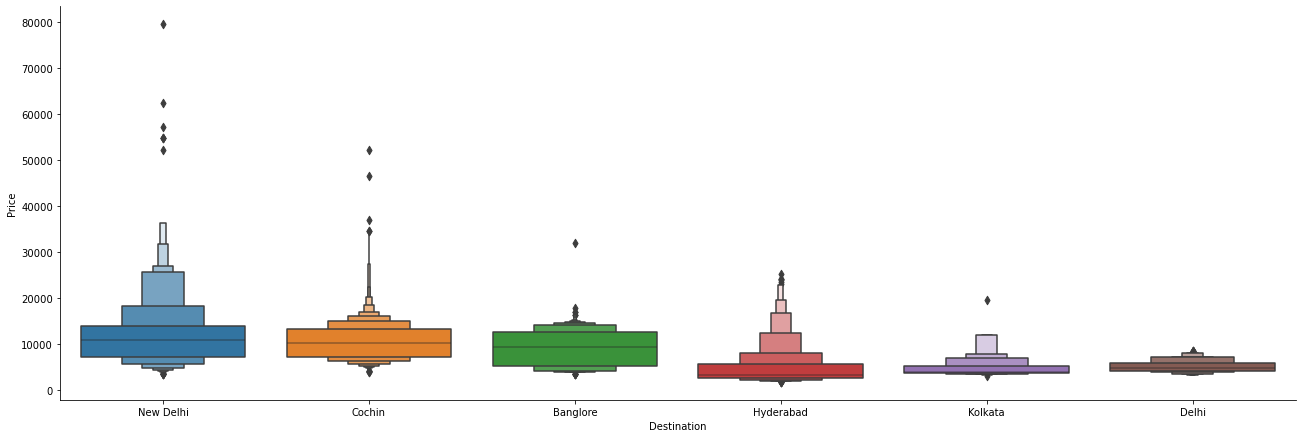

In [59]:
# Destination vs AveragePrice
sns.catplot(y='Price',x='Destination',data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

#### The range of air ticket prices in Delhi and New Delhi is the maximum, and it can be because: Jet fuel prices in Delhi in 2018 increased by 26.4%, which is also the national capital, the political seat of power and a highly visited city and a holiday place (same for Bangalore and Cochin)

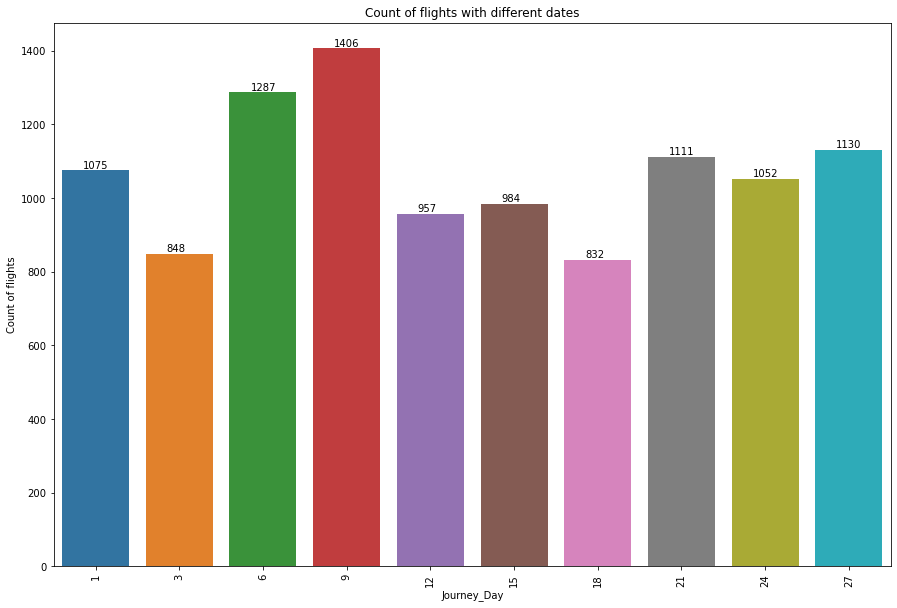

In [60]:
#Count of flights with different dates
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different dates')
ax=sns.countplot(x = 'Journey_day', data =train_data)
plt.xlabel('Journey_Day')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

[Text(0, 0, '1'),
 Text(1, 0, '3'),
 Text(2, 0, '6'),
 Text(3, 0, '9'),
 Text(4, 0, '12'),
 Text(5, 0, '15'),
 Text(6, 0, '18'),
 Text(7, 0, '21'),
 Text(8, 0, '24'),
 Text(9, 0, '27')]

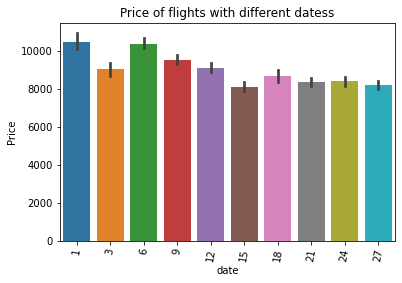

In [61]:
#Journey_Day v/s Average price
v5=sns.barplot(x='Journey_day', y='Price', data=train_data)
v5.set_title('Price of flights with different datess')
v5.set_ylabel('Price')
v5.set_xlabel('date')
v5.set_xticklabels(v5.get_xticklabels(), rotation=80)

#### There seems to be a trend in airfare compared to the day of the respective months, prices are higher at the beginning of the month, but this is not a trend if viewed from a broader perspective as this may be due to several reasons. Flight prices do not follow any particular pattern at any time of the month.

In [62]:
#Value Count of Airline.

train_data["Airline"].value_counts()


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#### Jet Airways has maximum number of airlines.

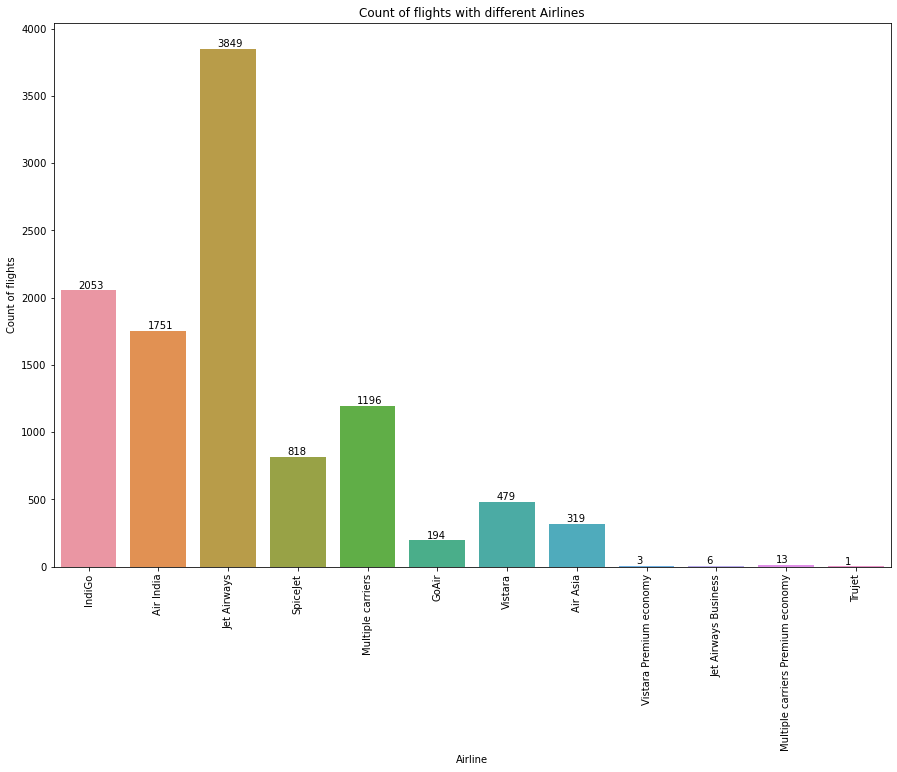

In [63]:
#Count of flights v/s Airline
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

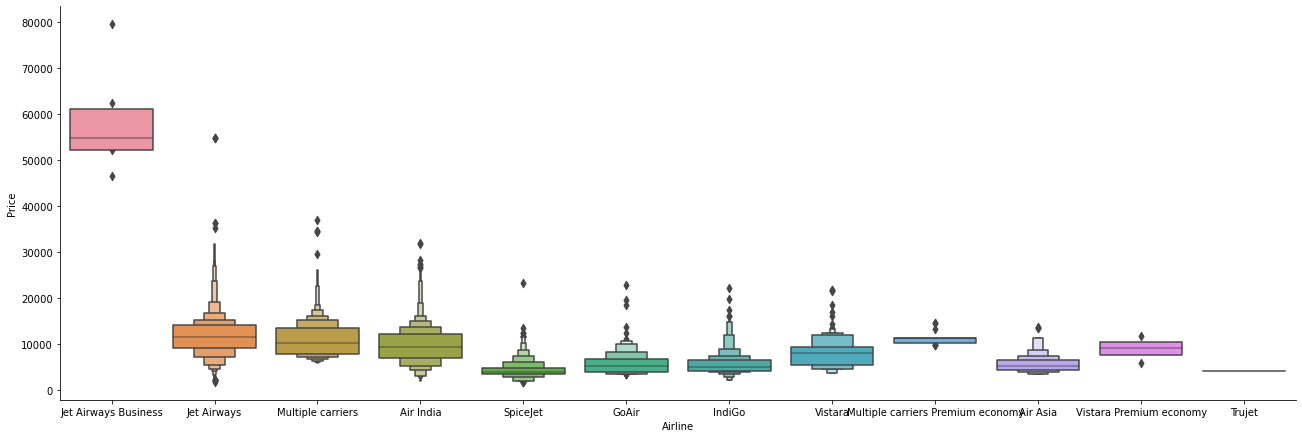

In [64]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

#### From graph we can see that Jet Airways Business have the highest Price.
#####  Apart from the first Airline almost all are having similar median

### Feature Engineering

In [65]:
# Understanding the price and count of flight as per the Morning, Evening, Afternoon and Night.

def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
train_data['Dep_Time']=train_data['Dep_Time'].apply(deparrtime)
train_data['Arrival_Time']=train_data['Arrival_Time'].apply(deparrtime)

In [66]:
# time of departure v/s count of flights
top_time=train_data.Dep_Time.value_counts()
top_time

Morning      4331
Evening      2829
Afternoon    2017
Night        1505
Name: Dep_Time, dtype: int64

[Text(0, 0, 'Night'),
 Text(1, 0, 'Afternoon'),
 Text(2, 0, 'Morning'),
 Text(3, 0, 'Evening')]

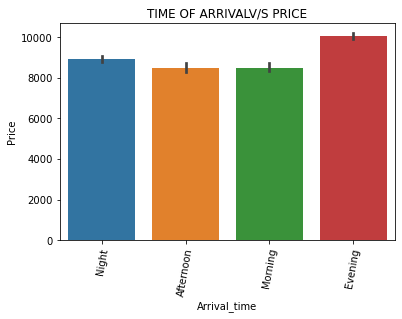

In [67]:
#TIME OF ARRIVAL V/S average price
v3=sns.barplot(x='Arrival_Time', y='Price', data=train_data)
v3.set_title('TIME OF ARRIVALV/S PRICE')
v3.set_ylabel('Price')
v3.set_xlabel('Arrival_time')
v3.set_xticklabels(v3.get_xticklabels(), rotation=80)

#### Early Morning flights and midnight flight prices are always cheaper.
#### Evening flight fares are more expensive as it's the most convenient and preffered time for people to travel.

[Text(0, 0, 'non-stop'),
 Text(1, 0, '2 stops'),
 Text(2, 0, '1 stop'),
 Text(3, 0, '3 stops'),
 Text(4, 0, '4 stops')]

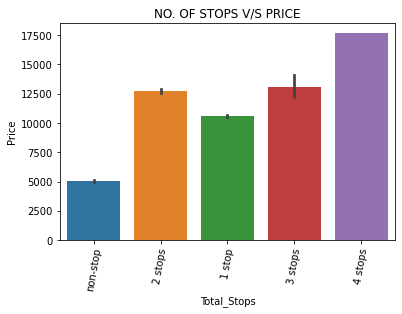

In [68]:
#total stops v/s average price

v4=sns.barplot(x='Total_Stops', y='Price', data=train_data)
v4.set_title('NO. OF STOPS V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('Total_Stops')
v4.set_xticklabels(v4.get_xticklabels(), rotation=80)

#### As the no. of stops/layovers increase, the fare price goes up accounting for no. of flights and due to other resources being used up for the same, except for one stop,it's average fare price is less.

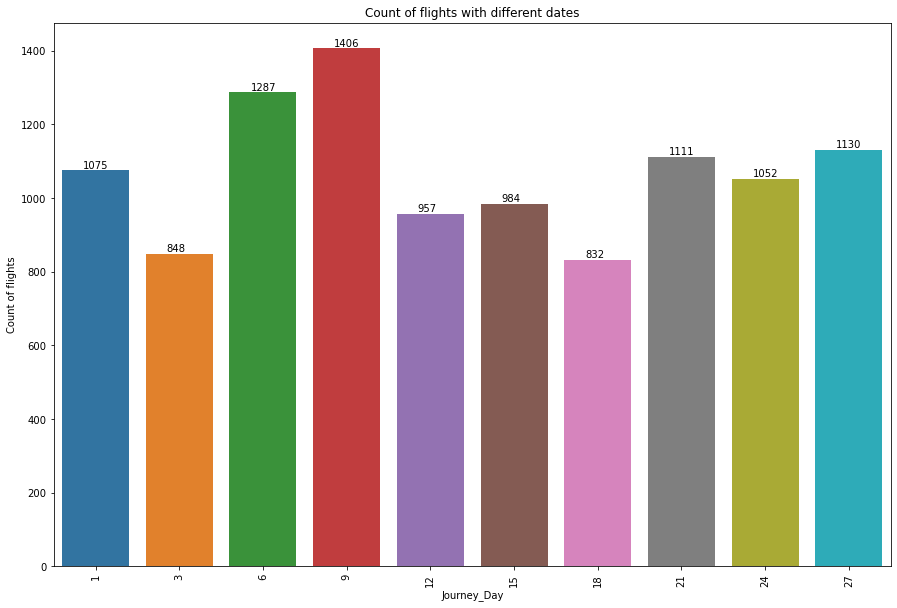

In [69]:
#Count of flights with different dates
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different dates')
ax=sns.countplot(x = 'Journey_day', data =train_data)
plt.xlabel('Journey_Day')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

[Text(0, 0, '1'),
 Text(1, 0, '3'),
 Text(2, 0, '6'),
 Text(3, 0, '9'),
 Text(4, 0, '12'),
 Text(5, 0, '15'),
 Text(6, 0, '18'),
 Text(7, 0, '21'),
 Text(8, 0, '24'),
 Text(9, 0, '27')]

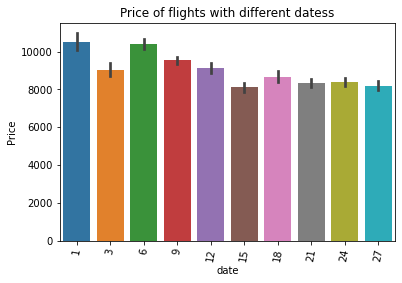

In [70]:
#Journey_Day v/s Average price
v5=sns.barplot(x='Journey_day', y='Price', data=train_data)
v5.set_title('Price of flights with different datess')
v5.set_ylabel('Price')
v5.set_xlabel('date')
v5.set_xticklabels(v5.get_xticklabels(), rotation=80)

#### There seems to be a trend in airfare compared to the day of the respective months, prices are higher at the beginning of the month, but this is not a trend if viewed from a broader perspective as this could be due to several reasons. Prices increase as the reservation date approaches the travel date. Therefore, flight prices do not follow any particular pattern at any time of the month.

# Handling Categorical Data

In [115]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [116]:
#value count of Source column

train_data["Source"].value_counts()


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

#### Arount 45% flight have Delhi as their Source

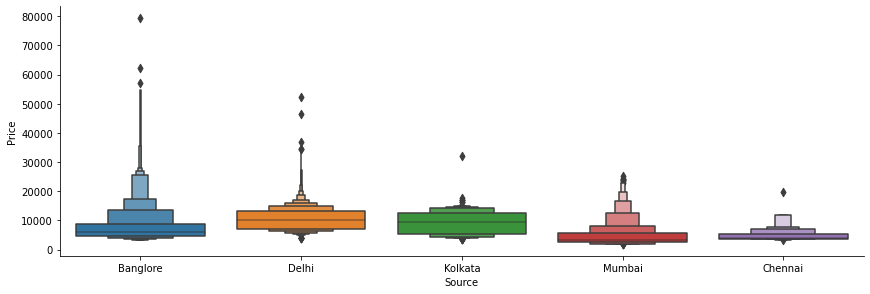

In [86]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


#### From graph we can see that Bangalore have the highest Price.

In [117]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [118]:
# value count of Destination Column

train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

#### Maximum flights have Cochin as there Destination and least flights have Kolkata as there Destination.

In [119]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
#Route Column Data
train_data["Route"]

In [ ]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [92]:
#value count of Total Stops Column
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

#### Maximum flights have only one stop

In [93]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [94]:
train_data.head()


,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,0,3897,24,3,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1,13302,1,3,16,50


In [122]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [123]:
data_train.head()


,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [124]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [125]:
data_train.head()


,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [75]:
data_train.shape


(10682, 30)

In [100]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Arrival_Time                               10682 non-null  object
 1   Duration                                   10682 non-null  object
 2   Total_Stops                                10682 non-null  int64 
 3   Price                                      10682 non-null  int64 
 4   Journey_day                                10682 non-null  int64 
 5   Journey_month                              10682 non-null  int64 
 6   Dep_hour                                   10682 non-null  int64 
 7   Dep_min                                    10682 non-null  int64 
 8   Airline_Air India                          10682 non-null  uint8 
 9   Airline_GoAir                              10682 non-null  uint8 
 10  Airline_IndiGo                    

### EDA Concluding Remarks: -
* > All the columns except our Prediction column, are Object Datatype.
* >Longer Time Duration has lesser count than the short Duration Flight.
* >There are no specific dates when the flights travel; the distribution is almost similar for all dates.
* >Total number of trip is the maximum for the month of May and lower in April.
* >We see that the average fare price is higher in the month of March.
* >The range of air ticket prices in Delhi and New Delhi is the maximum.
* >Jet Airways is the most preferred airline with the highest row count, followed by Indigo and AirIndia.
* >Count for Vistara Premium economy, Trujet, Multiple carries premium economy and Jet airways business is quite low..
* >From graph we can see that Jet Airways Business have the highest Price.
* >Early Morning flights and midnight flight prices are always cheaper and Evening flight fares are most expensive.
* >Majority of the flights take off from Delhi.
* >Maximum flights have Cochin as their Destination and least flights have Kolkata as their Destination.
* >In majority of the cases, flights take off and land on the same day.





    

# Test data
### Now we will perform above steps in Test data. We are not combining train and test data because of data leakage due to which our test data will know some of the results which is not good for the project

In [101]:
test_data = pd.read_excel("Test_set.xlsx")

In [102]:
test_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [103]:
# Preprocessing same as training data that we have done

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         


# Since all of our feature is categorical we will not be checking the skewness and outliers in this dataset.

# PreProcessing Pipeline

## Seperate the Features and the Label Column

In [126]:
x = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [127]:
y = data_train.iloc[:, 1]
y.head()


0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# Data Standardization

In [128]:
# standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [129]:
dataset = sc.fit_transform(x)
X = pd.DataFrame(dataset, columns= x.columns)
X

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.220666,1.237288,-1.467402,1.654154,-0.234950,-1.800436,-0.890014,-0.970614,1.279041,-0.442785,-0.136005,2.050151,-0.750530,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,3.234405
1,1.741432,-1.475307,0.250289,-1.303113,1.363607,-0.050909,-0.587094,-0.381999,-0.196319,2.258432,-0.136005,-0.487769,-0.750530,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
2,1.741432,-0.531796,1.109135,-0.607286,0.031476,-1.363054,0.018745,1.030677,-1.671678,-0.442785,-0.136005,-0.487769,1.332391,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,1.164018,-0.606266,-0.264206,1.164018,-0.366513,-0.264206,-0.192319,-0.309176
3,0.260383,-0.177979,0.250289,0.958326,-1.034229,1.407030,0.321664,-0.617445,-0.196319,-0.442785,-0.136005,2.050151,-0.750530,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
4,0.260383,-1.475307,-1.467402,0.610412,1.363607,1.115442,0.624584,-0.735168,0.983969,-0.442785,-0.136005,2.050151,-0.750530,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,3.234405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.220666,-0.531796,-0.608557,1.132283,1.630034,1.261236,0.018745,-0.970614,0.098753,-0.442785,-0.136005,-0.487769,-0.750530,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
10678,-1.220666,1.591104,-0.608557,1.306240,1.097181,1.407030,-0.284175,-0.970614,0.393825,2.258432,-0.136005,-0.487769,-0.750530,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
10679,-1.220666,1.591104,-0.608557,-0.781243,-0.234950,-0.342497,-0.284175,-0.852891,-1.671678,-0.442785,-0.136005,-0.487769,1.332391,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,2.728419,-0.264206,-0.192319,-0.309176
10680,-1.220666,-1.475307,-1.467402,-0.259372,0.297903,0.094885,-0.890014,-0.970614,0.688897,-0.442785,-0.136005,-0.487769,-0.750530,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,4.615260,-0.016761,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,-0.366513,-0.264206,-0.192319,3.234405


# Feature Selection

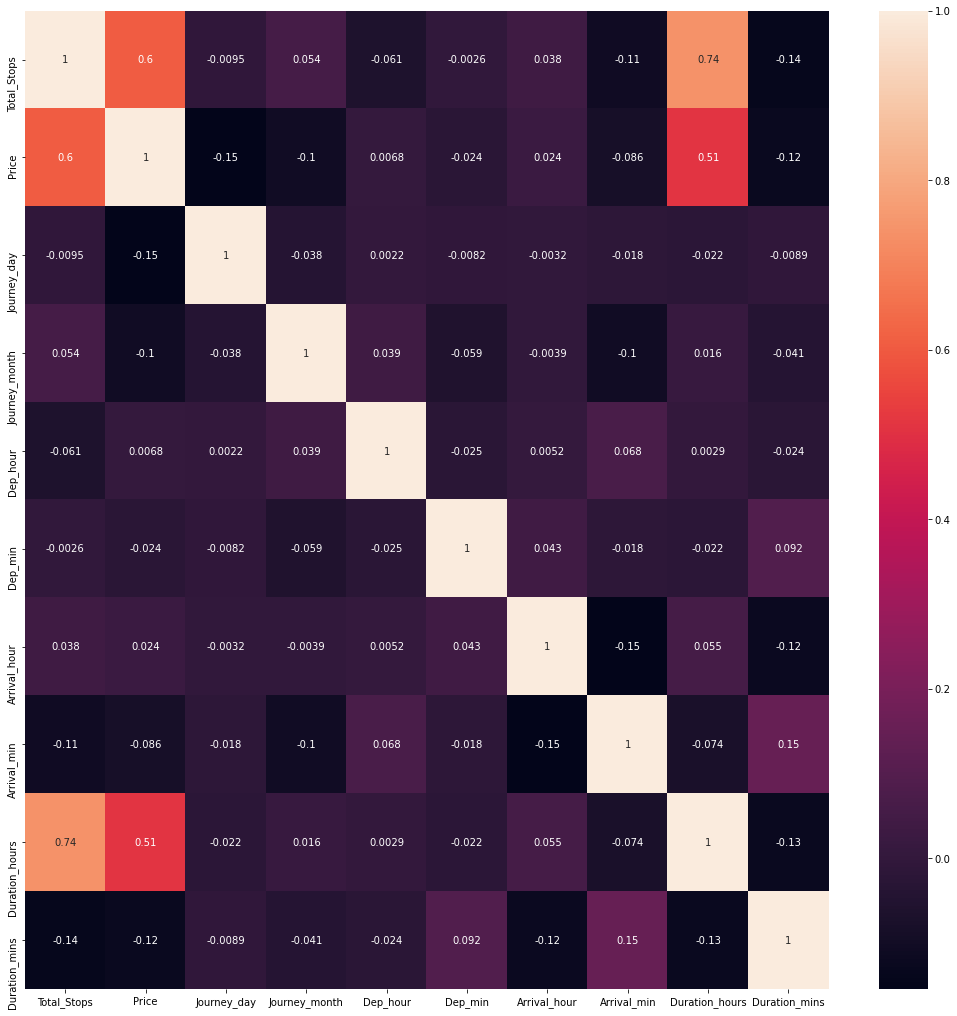

In [98]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True)

plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(X,y)

In [94]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp


,0
Total_Stops,2.134730
Journey_day,0.789629
Journey_month,1.196585
Dep_hour,1.408356
Dep_min,1.201844
Arrival_hour,1.862623
Arrival_min,1.568426
Duration_hours,1.791060
Duration_mins,1.079041
Airline_Air India,0.781333


In [95]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Total_Stops,2.134730
Arrival_hour,1.862623
Duration_hours,1.791060
Arrival_min,1.568426
Destination_Cochin,1.543762
Source_Delhi,1.531809
Dep_hour,1.408356
Dep_min,1.201844
Journey_month,1.196585
Duration_mins,1.079041


#### We can see that, there are several features that have approx 0 value,so we should remove it after authorizing it.But for now,we are not removing it, as it will lead to loss of data..

In [101]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [102]:
print(selection.feature_importances_)


[2.43198380e-01 1.44629307e-01 5.28745982e-02 2.37809229e-02
 2.12181878e-02 2.78026543e-02 1.88456253e-02 1.19542332e-01
 1.77446730e-02 9.48689778e-03 2.00029286e-03 1.76508895e-02
 1.32841044e-01 6.72452284e-02 1.82523894e-02 8.78948080e-04
 3.04070811e-03 9.99039763e-05 4.95355273e-03 7.83850377e-05
 4.25563629e-04 9.82640949e-03 3.20096980e-03 5.28328889e-03
 8.02509272e-03 1.40669858e-02 7.57776942e-03 5.36816741e-04
 2.48921827e-02]


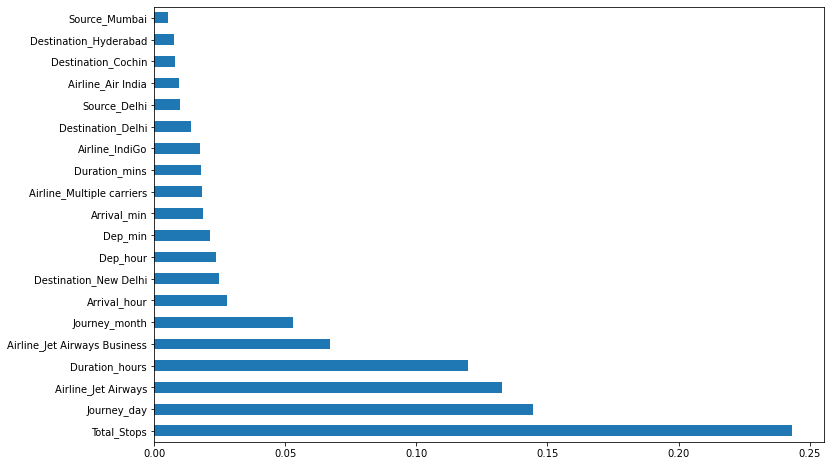

In [103]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


# Build Machine Learning Model

In [132]:
#Importing the models

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [133]:
#  check the best possible random state to train our model.
MaX_r2_score=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scores = r2_score(y_test,y_pred)
    if r2_scores>MaX_r2_score:
        MaX_r2_score = r2_scores
        random_state = i
    
print("MaX R2 score corresponding to random state",random_state,"is",MaX_r2_score)

MaX R2 score corresponding to random state 195 is 0.681226749892908


In [134]:
# Split the data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=195)

In [109]:
# Check the best kernellist for SVR model
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.3938702113153808
0.043472747985487614
0.0011566966862847083


#### We will select linear for testing the model

In [135]:
sv=SVR(kernel='linear')
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()
ls=Lasso()
rd=Ridge()

model=[lr,sv,dt,rf,kn,ab,gb,ls,rd]
kf = KFold(n_splits=5, random_state=54, shuffle=True)

train=[]
test=[]
Mse=[]
cv=[]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score*100)
    mse = mean_squared_error(y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,X,y,cv=kf)
    cv.append(score.mean()*100)
    
Performance={'Model':['Linear Regression','SupportVector','DecisionTree','RandomForest','KNN','AdaBoost','GradientBoosting','Lasso','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Mean Square Error':Mse,
            'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score
0,Linear Regression,60.880907,68.122675,6.808948e+06,-7.993836e+10
1,SupportVector,50.996163,55.154288,9.578975e+06,5.213662e+01
2,DecisionTree,97.125939,72.766105,5.817118e+06,7.125067e+01
3,RandomForest,95.462618,84.119227,3.392109e+06,8.039785e+01
4,KNN,83.247590,81.305719,3.993070e+06,7.541675e+01
5,AdaBoost,42.959531,42.941177,1.218768e+07,3.481188e+01
6,GradientBoosting,77.515823,81.978991,3.849260e+06,7.677981e+01
7,Lasso,60.880289,68.129112,6.807573e+06,6.197486e+01
8,Ridge,60.880870,68.124181,6.808626e+06,6.197246e+01


#### Observation
* > Random Forest model gives us the best accuracy, with an R2 score of 84%, but the model is overfitting on train data. We will try to tune this model to check if we can remove overfitting.
* > KNN boosting also gives a score of 81%, which is better than gradient boosting regressor and the model is overfitting less as well.
* > Random Forest Regressor provides us a cross validation score of 80%, and KNN  gives a score of 75%. 
####  We will select RandomForest as our final model and Hypertune it

# Hyperparameter tuning

In [136]:
from sklearn.model_selection import RandomizedSearchCV


In [137]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [138]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [139]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [140]:
rf_random.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  15.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  15.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [146]:
# looking at best parameters
rf_random.best_params_


{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [147]:
prediction = rf_random.predict(x_test)


In [156]:
RF_R2=r2_score(y_test,prediction)
RF_MSE = mean_squared_error(y_test,prediction)
RF_scores=cross_val_score(rf_random,x,y,cv=kf)
print('RandomForestRegressor Performance')
print('---------------------------------------------------')
print('Accuracy Score', RF_R2*100)
print('Cross Validation score',RF_scores.mean()*100)
print('Mean Square Error',RF_MSE)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   9.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  15.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  15.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   7.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   7.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   7.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   7.3s
[CV] END max_depth=25, max_features

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   1.2s
[CV] END max_depth=5, max_features=

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.6s
[CV] END max_depth=15, max_fea

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


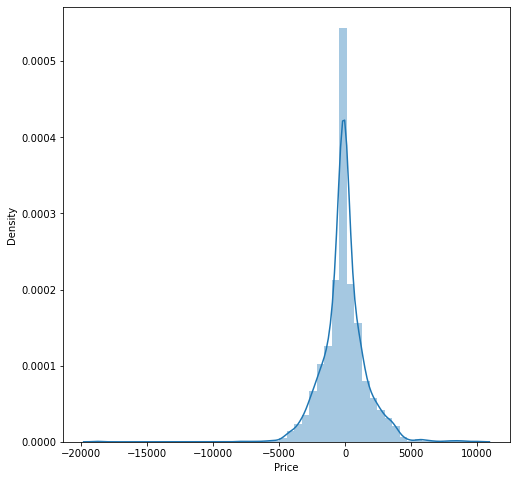

In [148]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()


* > Gaussian distribution shows our predictions are pretty good

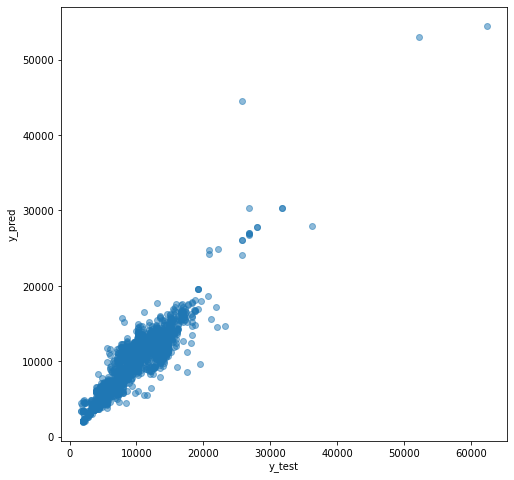

In [149]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

* >The linear distribution in the above scatter plot shows that our predictions are good


### If we observe the above metrics, We got good values with hyperparameter tuning model compare to model without hyper parameter tuning with Random Forest Regressor. Incresed the model prediction by 3%

# Save The Model 

In [170]:
import joblib
joblib.dump(rf_random,'Flight_price.obj')


['Flight_price.obj']

# Load The Model

In [171]:
loadmodel = joblib.load('Flight_price.obj')

In [176]:
import numpy as np
a = np.array(y_test)
pred = np.array(rf_random.predict(x_test))
df_final = pd.DataFrame({"Original":a,"Predicted":pred},index=range(len(a)))
df_final

,Original,Predicted
0,4995,6565.189360
1,4823,4789.675925
2,10123,9588.828033
3,10678,10243.718046
4,10348,9741.457505
...,...,...
2132,14781,13504.338667
2133,14714,11991.633243
2134,2227,2323.661940
2135,15603,15551.411049


#### The above dataframe have original data with the predicted data from the best model.
### Prediction with Visualization

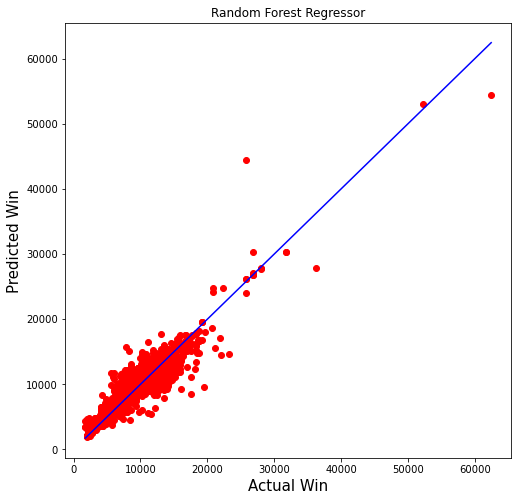

In [177]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,pred,c='r')
plt1 = max(max(pred),max(y_test))
plt2 = min(min(pred),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual Win',fontsize=15)
plt.ylabel('Predicted Win',fontsize=15)
plt.title("Random Forest Regressor")
plt.show()

#### The blue line represents the actual win and red dots represents the predicted win.

# Concluding Remarks
#### Hence, at the end, we were successfully able to train our regression model 'Random Forest Regressor’ to predict the flights of prices with an r2_score of 87%, and have achieved the required task successfully.
![thanks](https://ak.picdn.net/shutterstock/videos/1016353684/thumb/4.jpg)